<h1 align="center"><b>Capitolo 1: Introduzione al calcolo numerico</b></h1>

In [1]:
from math import pow
import matplotlib.pyplot as plt
import numpy as np

Si considerino le due funzioni seguenti, che sono algebricamente equivalenti:
$$ q_1(x) = (x - 1)^7 \quad \quad q_2(x) = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1 $$

Vogliamo calcolare il valore numerico di $q_1(x)$ e $q_2(x)$ con due valori di $x$, ovverosia $1$ e $1,0001$, e confrontare il loro valore esatto con l'errore di arrotondamento. Vogliamo inoltre usare una macchina che lavori con 15 cifre significative. Usando il seguente script in Python, possiamo ottenere i nostri risultati:

In [2]:
def q1(x) -> float:
    return (x - 1) ** 7

def q2(x) -> float:
    return pow(x, 7) - 7 * pow(x, 6) + 21 * pow(x, 5) \
        - 35 * pow(x, 4) + 35 * pow(x, 3) - 21 * pow(x, 2) + 7 * x - 1

def rounding_error(real, machine) -> float:
    return float(real) - float(machine)


# La lista contiene tuple del tipo (x, valore_reale)
for number, expect in [(1, 0), (1.0001, 10**(-28))]:
    # Approssimazione del numero alla 10a cifra decimale
    res1, res2 = "{0:.10g}".format(q1(number)), "{0:.10g}".format(q2(number))
    err1, err2 = rounding_error(expect, res1), rounding_error(expect, res2)
    print(f"With x = {number}, expect {expect}\nQ1 = {res1} | E1 = {err1}\nQ2 = {res2} | E2 = {err2}\n")

With x = 1, expect 0
Q1 = 0 | E1 = 0.0
Q2 = 0 | E2 = 0.0

With x = 1.0001, expect 1e-28
Q1 = 1e-28 | E1 = 0.0
Q2 = 1.776356839e-15 | E2 = -1.7763568389999e-15



Possiamo anche fare un plot delle due funzioni

<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_59297/4042452873.py:10: SyntaxWarning: invalid escape sequence '\i'
  plt.title("Valori di $q_1(x)$ e $q_2(x)$ dove $x \in [0,9900, 1,0100]$")


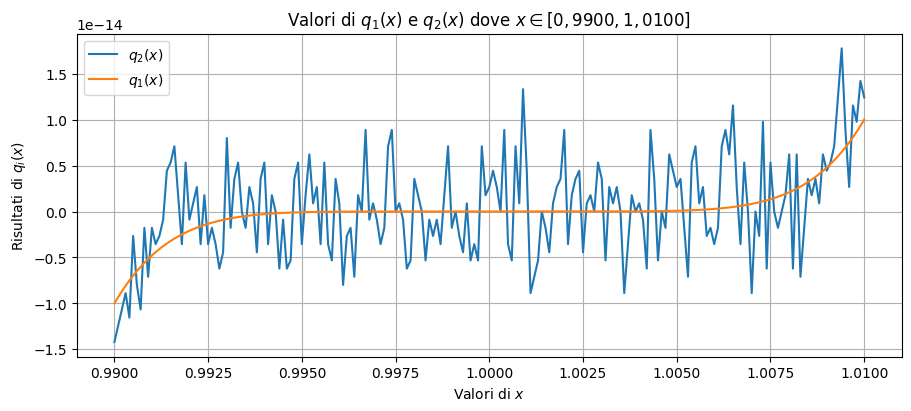

In [10]:
x = np.arange(0.9900, 1.0100, 0.0001)
y1 = [q1(i) for i in x]
y2 = [q2(i) for i in x]

plt.figure(figsize=(9, 4), layout='constrained')
plt.plot(x, y2, label="$q_2(x)$")
plt.plot(x, y1, label="$q_1(x)$")
plt.xlabel("Valori di $x$")
plt.ylabel("Risultati di $q_i(x)$")
plt.title("Valori di $q_1(x)$ e $q_2(x)$ dove $x \in [0,9900, 1,0100]$")
plt.legend()
plt.grid()
plt.show()